**Leduc Holdem**

In [1]:
# !pip install rlcard[torch]

In [2]:
import subprocess
import sys
import rlcard
from rlcard.agents import RandomAgent
from rlcard.utils import tournament, Logger, plot_curve

In [3]:
def getGameName(isTexas):
  return "no-limit-holdem" if isTexas else "leduc-holdem"

IS_TEXAS = False
GAME = getGameName(IS_TEXAS)

In [4]:
reqs = subprocess.check_output([sys.executable, "-m", "pip", "freeze"])
installedPackages = [r.decode().split("==")[0] for r in reqs.split()]

if "torch" in installedPackages:
  from rlcard.agents.dqn_agent import DQNAgent as DQNAgent
  from rlcard.agents.nfsp_agent import NFSPAgent as NFSPAgent

In [5]:
from rlcard.agents.cfr_agent import CFRAgent
from rlcard.agents.human_agents.nolimit_holdem_human_agent import HumanAgent as NoLimitHoldemHumanAgent
from rlcard.agents.human_agents.leduc_holdem_human_agent import HumanAgent as LeducHoldemHumanAgent

def getAgent(isTexas):
  return NoLimitHoldemHumanAgent if isTexas else LeducHoldemHumanAgent

In [6]:
env = rlcard.make(GAME, config = {"allow_step_back": True})
print (GAME)
evalEnv = rlcard.make(GAME)

leduc-holdem


In [7]:
agent = RandomAgent(num_actions = env.num_actions)

In [8]:
env.set_agents([agent for _ in range(env.num_players)])
trajectories, playerWins = env.run(is_training = False)

print(trajectories)

[[{'legal_actions': OrderedDict({1: None, 2: None, 3: None}), 'obs': array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'raw_obs': {'hand': 'HJ', 'public_card': None, 'all_chips': [2, 1], 'my_chips': 2, 'legal_actions': ['raise', 'fold', 'check'], 'current_player': 0}, 'raw_legal_actions': ['raise', 'fold', 'check'], 'action_record': [(1, 'fold')]}], [{'legal_actions': OrderedDict({0: None, 1: None, 2: None}), 'obs': array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'raw_obs': {'hand': 'HK', 'public_card': None, 'all_chips': [2, 1], 'my_chips': 1, 'legal_actions': ['call', 'raise', 'fold'], 'current_player': 1}, 'raw_legal_actions': ['call', 'raise', 'fold'], 'action_record': [(1, 'fold')]}, 2, {'legal_actions': OrderedDict({1: None, 2: None, 3: None}), 'ob

In [9]:
print(playerWins)

[ 0.5 -0.5]


In [10]:
cfrAgent = CFRAgent(env, f"experiments/{GAME.replace('-', '_')}_cfr_result/cfr_model")
cfrAgent.load()

In [11]:
evalEnv.set_agents([cfrAgent, RandomAgent(num_actions = env.num_actions)])

In [12]:
import os
import torch

with Logger(f"experiments/{GAME.replace('-', '_')}_cfr_result") as logger:
  for episode in range(1000):
    cfrAgent.train()
    print("\rIteration {}".format(episode), end = "")

    if episode % 50 == 0:
      logger.log_performance(env.timestep, tournament(evalEnv, 10000)[0])

  csvPath, figPath = logger.csv_path, logger.fig_path

modelOutputPath = os.path.join(logger.log_dir, "model.path")
torch.save(agent, modelOutputPath)
print(f"Model file saved to: {modelOutputPath}")

Iteration 0
----------------------------------------
  episode      |  193
  reward       |  0.01365
----------------------------------------
Iteration 50
----------------------------------------
  episode      |  9793
  reward       |  0.81305
----------------------------------------
Iteration 100
----------------------------------------
  episode      |  19393
  reward       |  0.8565
----------------------------------------
Iteration 150
----------------------------------------
  episode      |  28993
  reward       |  0.86905
----------------------------------------
Iteration 200
----------------------------------------
  episode      |  38593
  reward       |  0.9443
----------------------------------------
Iteration 250
----------------------------------------
  episode      |  48193
  reward       |  0.9557
----------------------------------------
Iteration 300
----------------------------------------
  episode      |  57793
  reward       |  0.89315
----------------------------

In [13]:
from rlcard.agents import LeducholdemHumanAgent as HumanAgent

CSV Path:  experiments/leduc_holdem_cfr_result\performance.csv
Fig Path:  experiments/leduc_holdem_cfr_result\fig.png


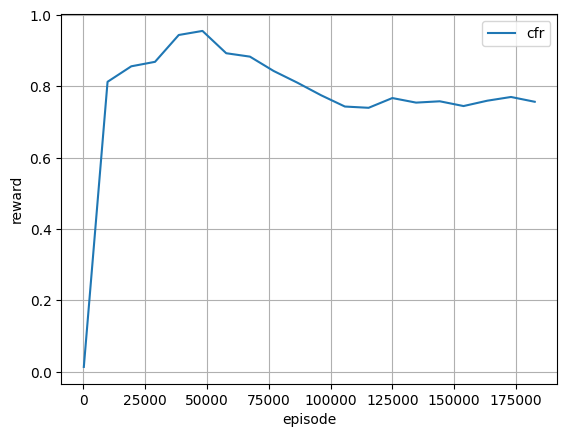

In [14]:
plot_curve(csvPath, figPath, "cfr")
print("CSV Path: ", csvPath)
print("Fig Path: ", figPath)

In [15]:
agent = RandomAgent(num_actions = env.num_actions)
env.set_agents([agent for _ in range(env.num_players)])

In [16]:
trajectories, playerWins = env.run(is_training = False)

In [17]:
print(trajectories)

[[{'legal_actions': OrderedDict({1: None, 2: None, 3: None}), 'obs': array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'raw_obs': {'hand': 'SK', 'public_card': None, 'all_chips': [2, 1], 'my_chips': 2, 'legal_actions': ['raise', 'fold', 'check'], 'current_player': 0}, 'raw_legal_actions': ['raise', 'fold', 'check'], 'action_record': [(1, 'fold')]}], [{'legal_actions': OrderedDict({0: None, 1: None, 2: None}), 'obs': array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'raw_obs': {'hand': 'HQ', 'public_card': None, 'all_chips': [2, 1], 'my_chips': 1, 'legal_actions': ['call', 'raise', 'fold'], 'current_player': 1}, 'raw_legal_actions': ['call', 'raise', 'fold'], 'action_record': [(1, 'fold')]}, 2, {'legal_actions': OrderedDict({1: None, 2: None, 3: None}), 'ob

In [18]:
print(playerWins)

[ 0.5 -0.5]


In [19]:
def createEnvForUser(game, unloadedAgent):
  env = rlcard.make(game)
  print(game)
  humanAgent = HumanAgent(env.num_actions)
  cfrAgent = unloadedAgent
  cfrAgent.load()
  print(cfrAgent.get_state(0))
  env.set_agents([humanAgent, cfrAgent])
  return env

In [20]:
from rlcard.utils import print_card
from rlcard import models

print(cfrAgent.model_path)
gameEnv = createEnvForUser(getGameName(IS_TEXAS), cfrAgent)
print(cfrAgent.get_state(0))


experiments/leduc_holdem_cfr_result/cfr_model
leduc-holdem
(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [21]:
print(">> Leduc Hold'Em Pre-Trained Model")
print(gameEnv.name)
while (True):
    print(">> Start a New Game")

    trajectories, payoffs = gameEnv.run(is_training = False)

    # If the human does not take the final action, print other players' actions

    finalState = trajectories[0][-1]
    actionRecord = finalState["action_record"]
    state = finalState["raw_obs"]
    actionList = []

    for i in range(1, len(actionRecord) + 1):
        if actionRecord[-i][0] == state["current_player"]:
            break
        actionList.insert(0, actionRecord[-i])
    
    for pair in actionList:
        print('>> Player', pair[0], "chooses", pair[1])

    # Let's look at what the agent card is
        
    print("===============     CFR Agent    ===============")
    print_card(gameEnv.get_perfect_information()["hand_cards"][1])

    print("===============     Result     ===============")
    if payoffs[0] > 0:
        print("You win {} chips!".format(payoffs[0]))
    elif payoffs[0] == 0:
        print("It is a tie.")
    else:
        print("You lose {} chips!".format(-payoffs[0]))
    print("")

    inputs = input("Press any key to continue, Q to exit\n")
    if inputs.lower() == "q":
      break

>> Leduc Hold'Em Pre-Trained Model
leduc-holdem
>> Start a New Game
>> Player 1 chooses raise

=============== Community Card ===============
┌─────────┐
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
└─────────┘
===============   Your Hand    ===============
┌─────────┐
│K        │
│         │
│         │
│    ♠    │
│         │
│         │
│        K│
└─────────┘
===============     Chips      ===============
Yours:   ++
Agent 1: ++++
=========== Actions You Can Choose ===========
0: call, 1: raise, 2: fold

